In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
class error_graph:
    #
    def __init__(self,h=3,w=3) -> None:
        self.h=h#长
        self.w=w#宽
        self.bit_error=np.zeros([h,w,2])#第三个维度存储错误
        self.dual_bit_error=np.zeros([h-1,w-1,2])#对偶格上的比特
        self.X_measure=np.ones([h-1,w])
        self.Z_measure=np.ones([h,w-1])
        #调色板设置
        #从第一到第八分别对应No error,X error,Y error,Z error,+1 X-Stablizer,-1 X-s,+1 Z-s,-1 Z-s
        colors=[(0.7,0.7,0.7),(0.556, 0.4, 1.0),
                (0.736, 0.4, 1.0),(1.0,0.4,0.544),
                (0.772, 0.85, 0.55),(0.844, 1.0, 0.4),
                (0.55, 0.85, 0.598),(0.4, 1.0, 0.496)]
        nodes=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,1]
        self.cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

    def print(self):
        h=self.h
        w=self.w
        image=np.zeros([2*h-1,2*w-1])
        #渲染比特部分
        for i in range(h):
            for j in range(w):
                if self.bit_error[i,j,0]==1:#只有X
                    image[2*i,2*j]=0.1
                elif self.bit_error[i,j,1]==1:#只有Z
                    image[2*i,2*j]=0.3
                elif self.bit_error[i,j,0]==1 and self.bit_error[i,j,1]==1:#有Y
                    image[2*i,2*j]=0.2
        for i in range(h-1):
            for j in range(w-1):
                if self.bit_error[i,j,0]==1:#只有X
                    image[2*i+1,2*j+1]=0.1
                elif self.bit_error[i,j,1]==1:#只有Z
                    image[2*i+1,2*j+1]=0.3
                elif self.bit_error[i,j,0]==1 and self.bit_error[i,j,1]==1:#有Y
                    image[2*i+1,2*j+1]=0.2
        #渲染X稳定子
        for i in range(h-1):
            for j in range(w):
                if self.X_measure[i,j]==1:
                    image[2*i+1,2*j]=0.4
                elif self.X_measure[i,j]==-1:
                    image[2*i+1,2*j]=0.5
        #渲染Z稳定子
        for i in range(h):
            for j in range(w-1):
                if self.Z_measure[i,j]==1:
                    image[2*i,2*j+1]=0.6
                elif self.Z_measure[i,j]==-1:
                    image[2*i,2*j+1]=1.0
        plt.imshow(image,cmap=self.cmap2,vmin=0,vmax=1)
        plt.show()

    #以退极化信道产生一个错误
    def error_generate_depolar(self,p):
        h=self.h
        w=self.w
        error_bit=np.random.binomial(1,p,(h,w,2))
        error_dual_bit=np.random.binomial(1,p,(h-1,w-1,2))
        self.bit_error=error_bit
        self.dual_bit_error=error_dual_bit
    
    def measure(self):

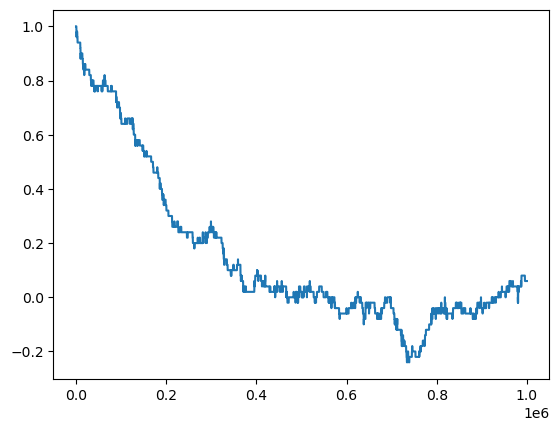

In [32]:
num=1000000
a=error_graph(r=10,c=10)
p=0.1
energy=np.zeros(num)
for i in range(num):
    a.once_MC_edge(p)
    a.once_MC(p)
    energy[i]=a.mag_cal()
plt.plot(np.arange(start=0,stop=num,step=1),energy)
plt.show()

now j=5 i=0
now j=5 i=1
now j=5 i=2
now j=5 i=3
now j=5 i=4
now j=5 i=5
now j=5 i=6
now j=5 i=7
now j=5 i=8
now j=5 i=9
now j=10 i=0
now j=10 i=1
now j=10 i=2
now j=10 i=3
now j=10 i=4
now j=10 i=5
now j=10 i=6
now j=10 i=7
now j=10 i=8
now j=10 i=9
now j=15 i=0
now j=15 i=1
now j=15 i=2
now j=15 i=3
now j=15 i=4
now j=15 i=5
now j=15 i=6
now j=15 i=7
now j=15 i=8
now j=15 i=9


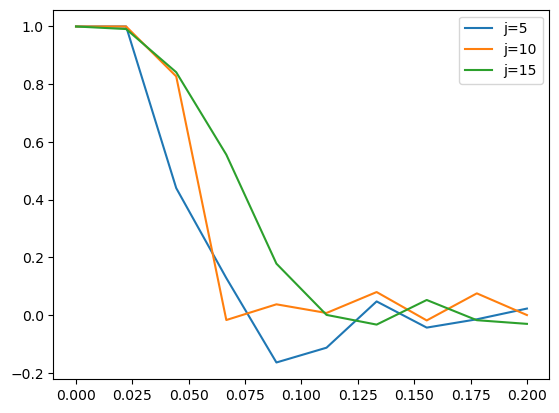

In [33]:
for j in [5,10,15]:
    a=error_graph(r=j,c=j)
    #a=error_graph(r=10,c=10)
    num=10
    p=np.linspace(0,0.2,num)
    energy=np.zeros(num)
    for i in range(10):
        energy[i]=a.MC_energy_cal(1000000,200000,p[i],a.mag_cal)
        print(f'now j={j} i={i}')
    plt.plot(p,energy,label=f'j={j}')
plt.legend()
plt.show()

TypeError: randint() takes at least 1 positional argument (0 given)

In [ ]:
#a=error_graph(Erow=[(1,2),(1,3)],r=10,c=10)
num=100000
a=error_graph(r=10,c=10)
c=[]
for i in range(num):
    a.once_MC(0.3)
    c.append(a.energy_cal())
a.print()
x=np.array([i for i in range(num)])
plt.plot(x,np.array(c))
plt.show()


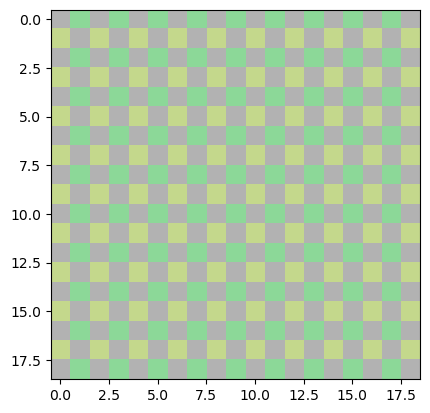

In [5]:
a=error_graph(h=10,w=10)
a.print()

(0.7450980392156863, 0.6823529411764706, 0.8313725490196079)


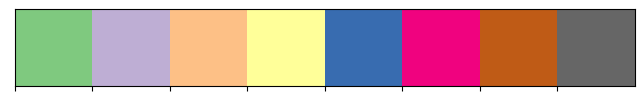

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure()
sns.palplot(sns.color_palette(palette='Accent')[:])#输出默认颜色
print(sns.color_palette(palette='Accent')[1])
plt.show()

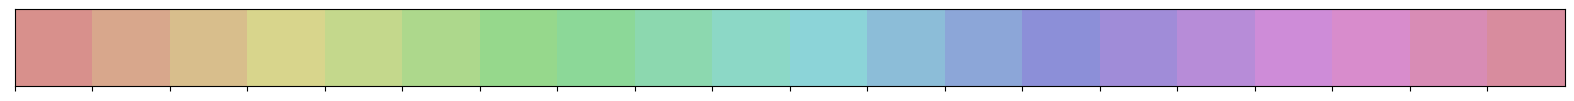

In [78]:
sns.palplot(sns.hls_palette(n_colors=20, l=0.7, s=.5))
plt.show()

In [83]:
print(sns.hls_palette(n_colors=20, l=.7, s=1)[4])

(0.8439999999999999, 1.0, 0.3999999999999999)
